In [3]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as clt
import ptitprince as pt

sns.set(style='whitegrid', font_scale=2)

df = pd.read_pickle('/home/mwisdom/Documents/data_analysis/analysed_data/One_Second_Hold/SNL_photo36/AllSessionsDataframe/SNL_photo36_all_sessions.pkl')

#SessionDates = df['SessionDate'].unique()



"SessionDates = df['SessionDate'].unique()"

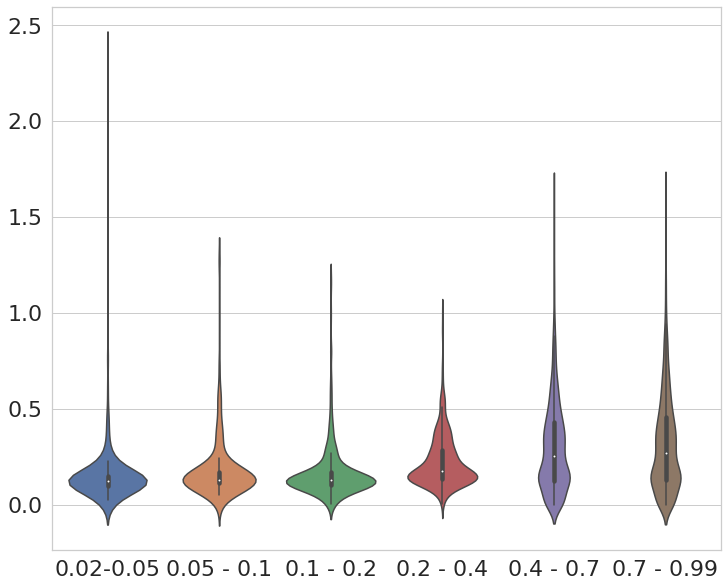

In [21]:
Cue_Delay_bin_filts = {'0.02-0.05': (df['CueDelay'] > 0.02) & (df['CueDelay'] < 0.05) & (df['TrainingLevel'] == 3),
'0.05 - 0.1': (df['CueDelay'] > 0.05) & (df['CueDelay'] < 0.1) & (df['TrainingLevel'] == 3),
'0.1 - 0.2': (df['CueDelay'] > 0.1) & (df['CueDelay'] < 0.2) & (df['TrainingLevel'] == 3),
'0.2 - 0.4': (df['CueDelay'] > 0.2) & (df['CueDelay'] < 0.4) & (df['TrainingLevel'] == 3),
'0.4 - 0.7': (df['CueDelay'] > 0.4) & (df['CueDelay'] < 0.7) & (df['TrainingLevel'] == 3),
'0.7 - 0.99': (df['CueDelay'] > 0.4) & (df['CueDelay'] < 0.99) & (df['TrainingLevel'] == 3)}

CentrePortHoldTimes_by_CueDelay = {}

for k, v in Cue_Delay_bin_filts.items():
    CueDelay_filtered_df = df.loc[v]
    array_CentrePortHoldTimes = np.hstack(CueDelay_filtered_df['CentrePortHoldTimes'])
    CentrePortHoldTimes_by_CueDelay[k] = array_CentrePortHoldTimes

df_CentrePortHoldTimes_by_CueDelay = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in CentrePortHoldTimes_by_CueDelay.items() ]))

f, ax = plt.subplots(figsize= (12, 10))
ax = sns.violinplot( data = df_CentrePortHoldTimes_by_CueDelay)

Text(0.5, 1.0, 'Figure P1\n Bar Plot')

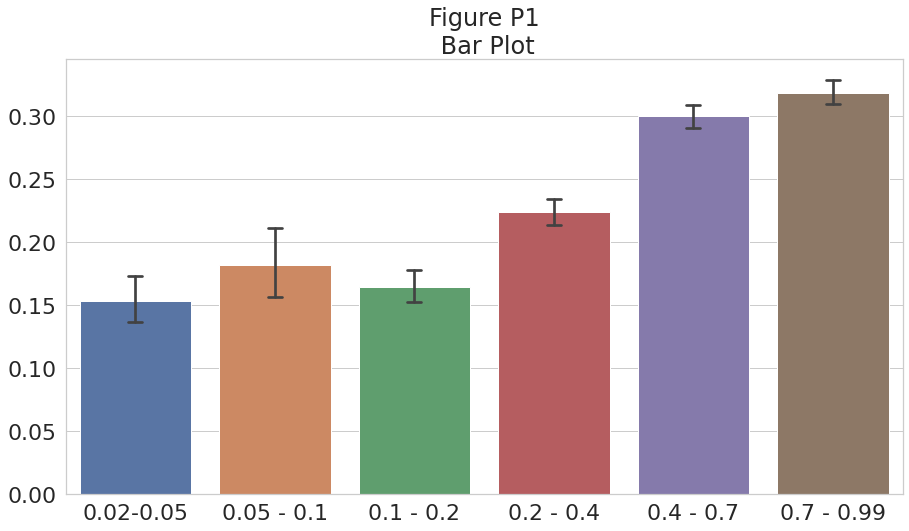

In [26]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(data = df_CentrePortHoldTimes_by_CueDelay, capsize= .1)
plt.title("Figure P1\n Bar Plot")

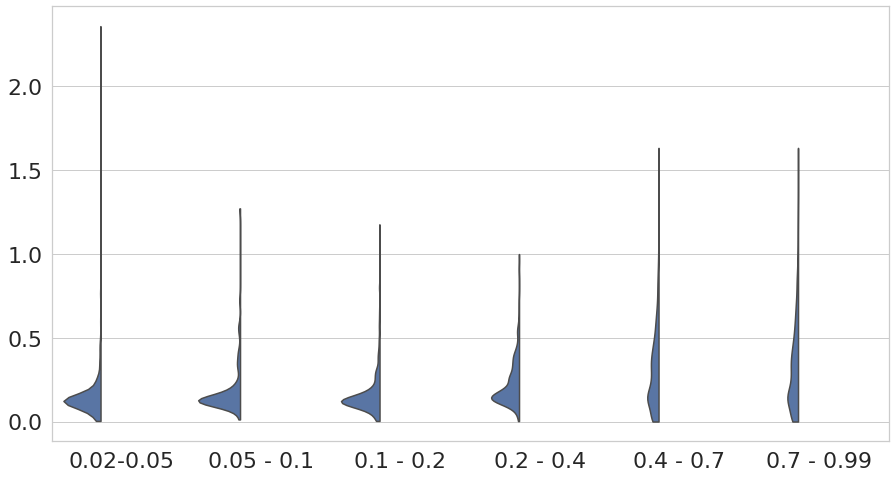

In [27]:
f, ax = plt.subplots(figsize=(15, 8)); ort="h"; pal = sns.color_palette(n_colors=1)

ax=pt.half_violinplot( data = df_CentrePortHoldTimes_by_CueDelay, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = 'v')

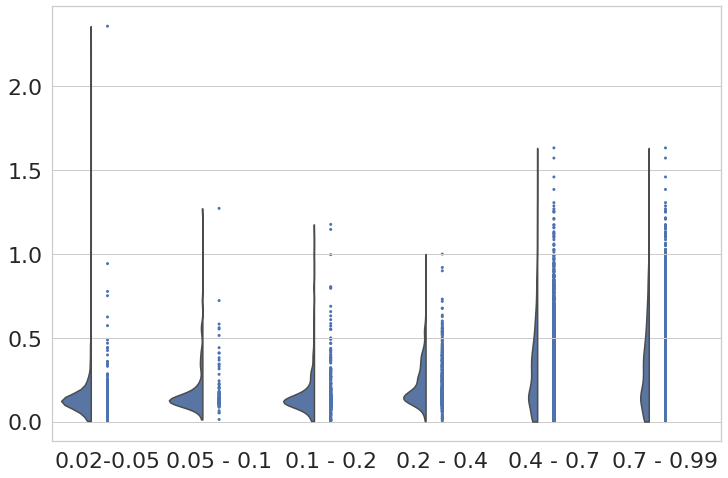

In [29]:
f, ax = plt.subplots(figsize=(12, 8))
ax=pt.half_violinplot( data = df_CentrePortHoldTimes_by_CueDelay, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = 'v')
ax=sns.stripplot( data = df_CentrePortHoldTimes_by_CueDelay, palette = pal, edgecolor = "white",
                 size = 3, jitter = 0, zorder = 0, orient = 'v')

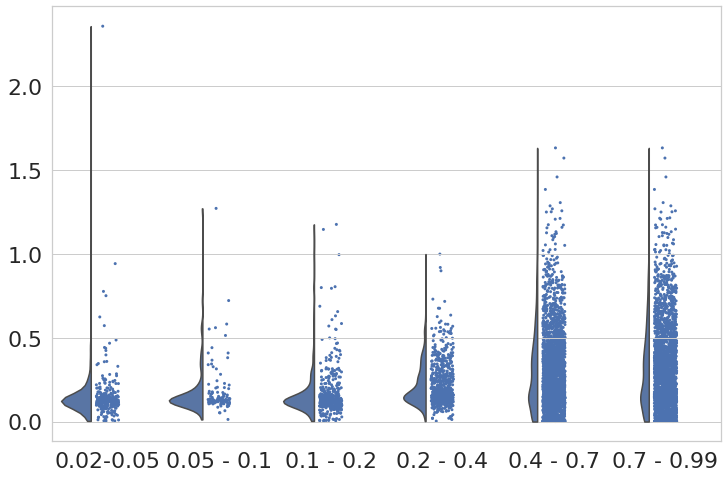

In [33]:
f, ax = plt.subplots(figsize=(12, 8))
ax=pt.half_violinplot( data = df_CentrePortHoldTimes_by_CueDelay, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = 'v')
ax=sns.stripplot( data = df_CentrePortHoldTimes_by_CueDelay, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = 'v')